In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('credit_risk_dataset.csv')
print(df.head())


   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [23]:
mean = df['person_age'].mean()
std = df['person_age'].std()
print (mean)
print(std)

27.73459992019889
6.348078419225359


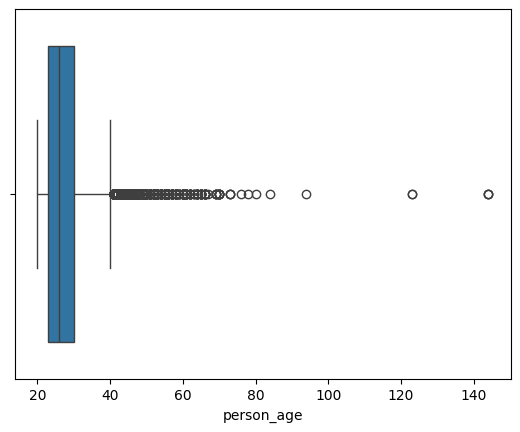

In [24]:
sns.boxplot(x=df['person_age'])
plt.show()

In [25]:
limite_inferior = 0
limite_superior = mean + 3 * std

outliers = df[(df['person_age'] < limite_inferior) | (df['person_age'] > limite_superior)]
print(outliers)

       person_age  person_income person_home_ownership  person_emp_length  \
81            144         250000                  RENT                4.0   
183           144         200000              MORTGAGE                4.0   
575           123          80004                  RENT                2.0   
747           123          78000                  RENT                7.0   
29121          50         900000              MORTGAGE               11.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status 

In [26]:
mean = df['person_emp_length'].mean()
std = df['person_emp_length'].std()
print (mean)
print(std)

4.789686296787225
4.1426301488878625


In [27]:
limite_inferior = 0
limite_superior = mean + 3 * std

outliers = df[(df['person_emp_length'] < limite_inferior) | (df['person_emp_length'] > limite_superior)]
print(outliers)


       person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
210            21         192000              MORTGAGE              123.0   
17834          34         948000              MORTGAGE               18.0   
17877          34         334000                   OWN               18.0   
17888          34          61200                  RENT               18.0   
...           ...            ...                   ...                ...   
32515          53         106000              MORTGAGE               38.0   
32516          52          29000                   OWN               23.0   
32534          76          75000                  RENT               23.0   
32539          61         148000              MORTGAGE               30.0   
32562          61         160000              MORTGAGE               30.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status 

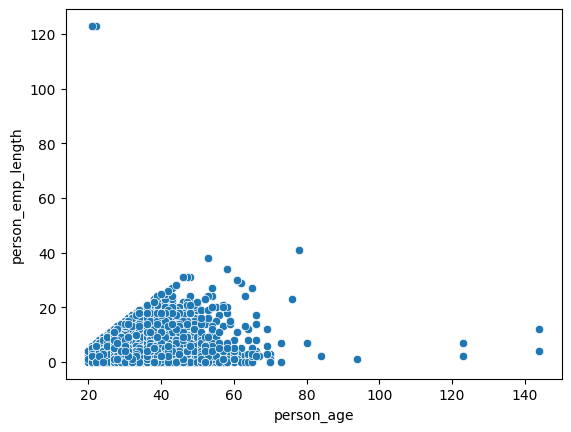

In [30]:

sns.scatterplot(x=df['person_age'], y=df['person_emp_length'], data=df)
plt.show()

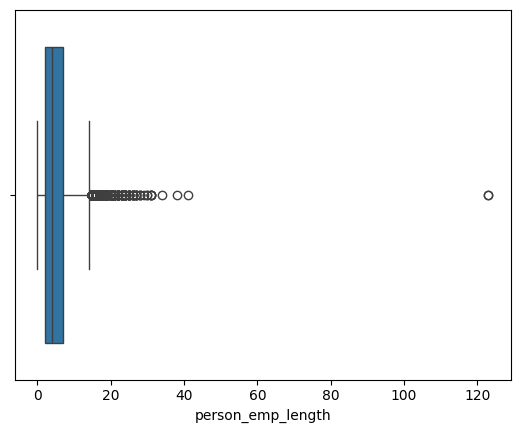

In [31]:
sns.boxplot(x=df['person_emp_length'])
plt.show()

<Axes: xlabel='person_age', ylabel='person_income'>

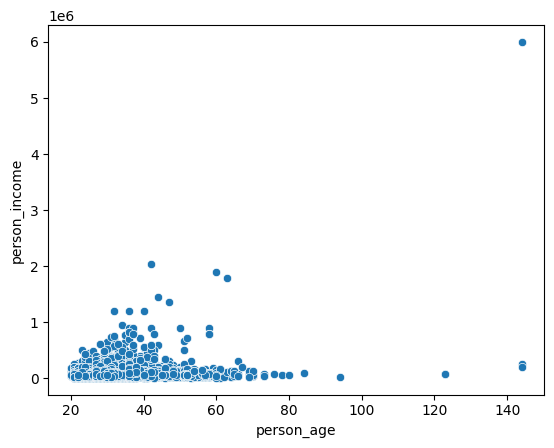

In [32]:
sns.scatterplot(x=df['person_age'], y=df['person_income'], data=df)


<Axes: xlabel='person_age', ylabel='loan_amnt'>

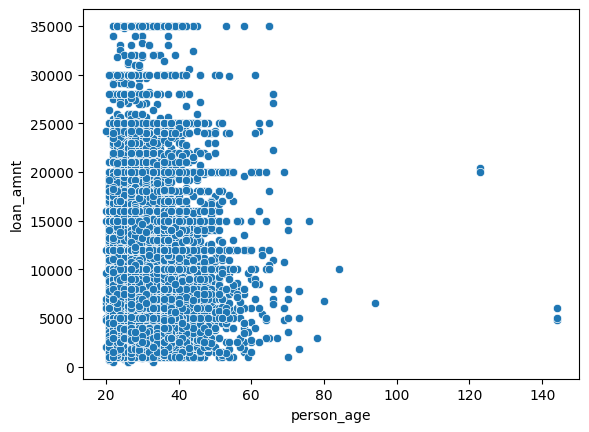

In [33]:
sns.scatterplot(x=df['person_age'], y=df['loan_amnt'], data=df)


<Axes: xlabel='person_age', ylabel='loan_int_rate'>

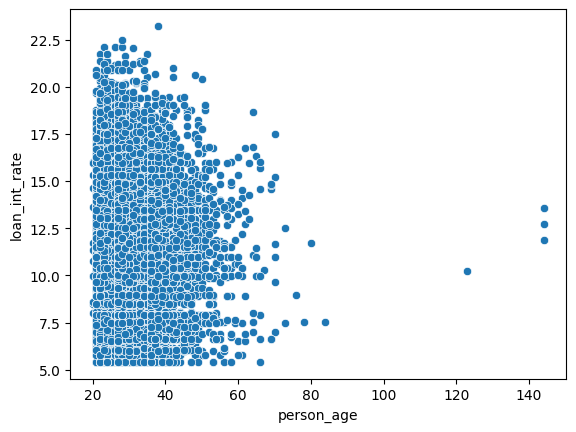

In [34]:
sns.scatterplot(x=df['person_age'], y=df['loan_int_rate'], data=df)


<Axes: xlabel='person_income', ylabel='loan_amnt'>

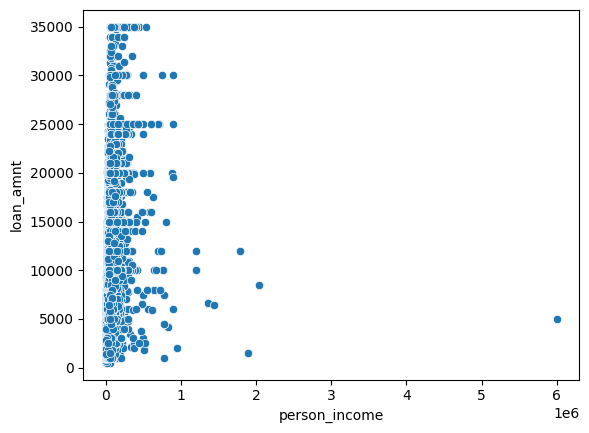

In [35]:
sns.scatterplot(x=df['person_income'], y=df['loan_amnt'], data=df)


<Axes: xlabel='loan_amnt', ylabel='loan_int_rate'>

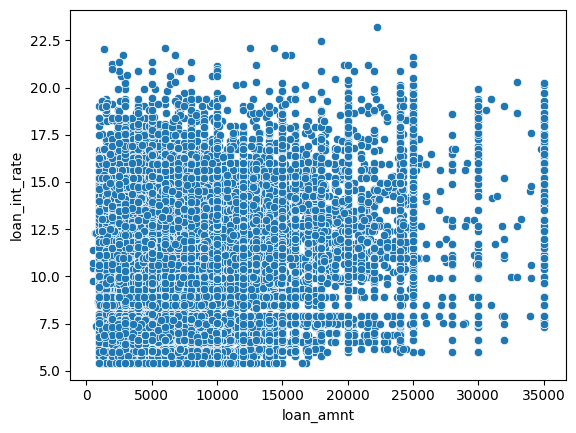

In [37]:
sns.scatterplot(x=df['loan_amnt'], y=df['loan_int_rate'], data=df)


<Axes: xlabel='person_income', ylabel='loan_int_rate'>

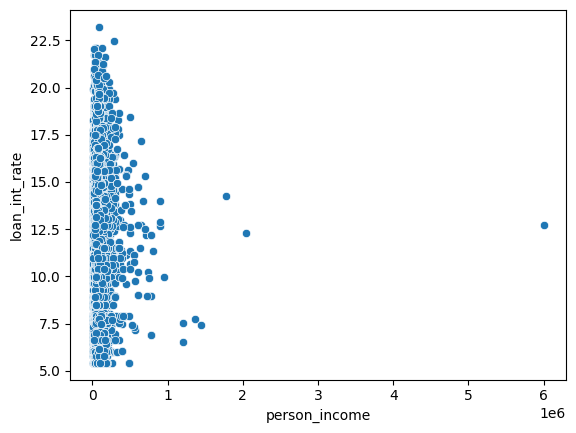

In [38]:
sns.scatterplot(x=df['person_income'], y=df['loan_int_rate'], data=df)


In [47]:
print(df['cb_person_default_on_file'])
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].replace({'Y': 1, 'N': 0})
print(df.head())

0        1
1        0
2        0
3        0
4        1
        ..
32576    0
32577    0
32578    0
32579    0
32580    0
Name: cb_person_default_on_file, Length: 32581, dtype: int64
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000         

<Axes: xlabel='person_age', ylabel='cb_person_default_on_file'>

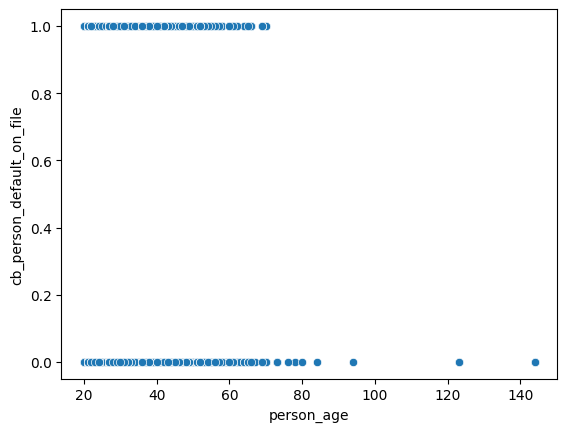

In [75]:
sns.scatterplot(x=df['person_age'], y=df['cb_person_default_on_file'], data=df)


In [48]:
valores_unicos = df['loan_intent'].unique()
print("Valores únicos:", valores_unicos)

Valores únicos: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


In [55]:
df['loan_intent'] = df['loan_intent'].replace({'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3, 
'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION': 5})
print(df['loan_intent'])

0        0
1        1
2        2
3        2
4        2
        ..
32576    0
32577    0
32578    4
32579    0
32580    2
Name: loan_intent, Length: 32581, dtype: int64


<Axes: xlabel='cb_person_default_on_file', ylabel='loan_int_rate'>

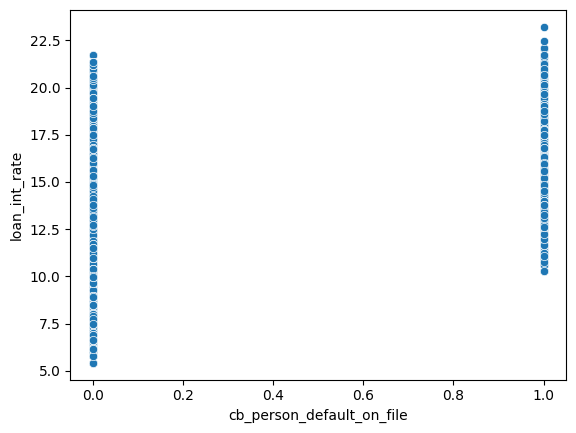

In [68]:
sns.scatterplot(x=df['cb_person_default_on_file'], y=df['loan_int_rate'], data=df)


In [49]:
valores_unicos = df['loan_grade'].unique()
print("Valores únicos:", valores_unicos)

Valores únicos: ['D' 'B' 'C' 'A' 'E' 'F' 'G']


In [57]:
df['loan_grade'] = df['loan_grade'].replace({'D': 0, 'B': 1, 'C': 2, 'A': 3, 'E': 4, 'F': 5, 'G': 6})
print(df['loan_grade'])

0        0
1        1
2        2
3        2
4        2
        ..
32576    2
32577    3
32578    1
32579    1
32580    1
Name: loan_grade, Length: 32581, dtype: int64


<Axes: xlabel='person_home_ownership', ylabel='loan_grade'>

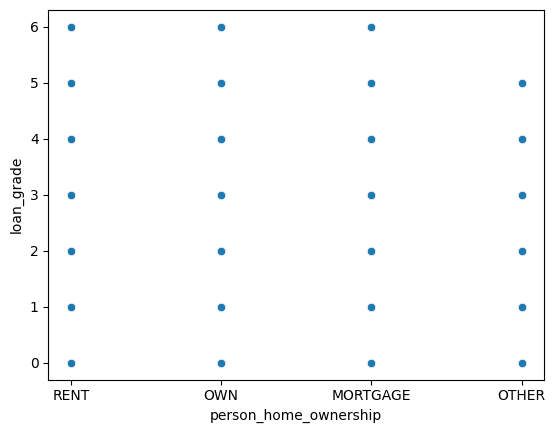

In [74]:
sns.scatterplot(x=df['person_home_ownership'], y=df['loan_grade'], data=df)


In [51]:
nombres_columnas = df.columns
print(nombres_columnas)

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')


<Axes: xlabel='person_age', ylabel='cb_person_cred_hist_length'>

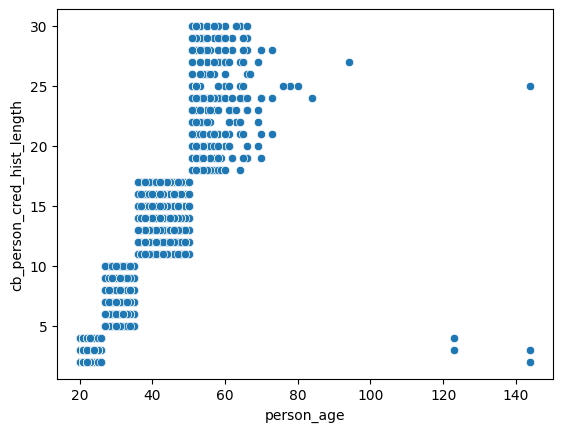

In [52]:
sns.scatterplot(x=df['person_age'], y=df['cb_person_cred_hist_length'], data=df)


<Axes: xlabel='cb_person_default_on_file', ylabel='loan_amnt'>

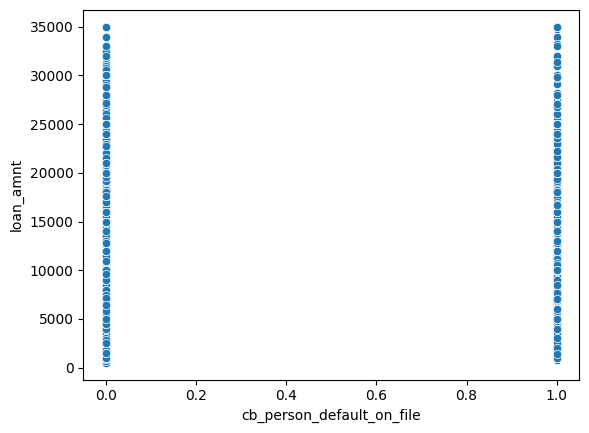

In [53]:
sns.scatterplot(x=df['cb_person_default_on_file'], y=df['loan_amnt'], data=df)


<Axes: >

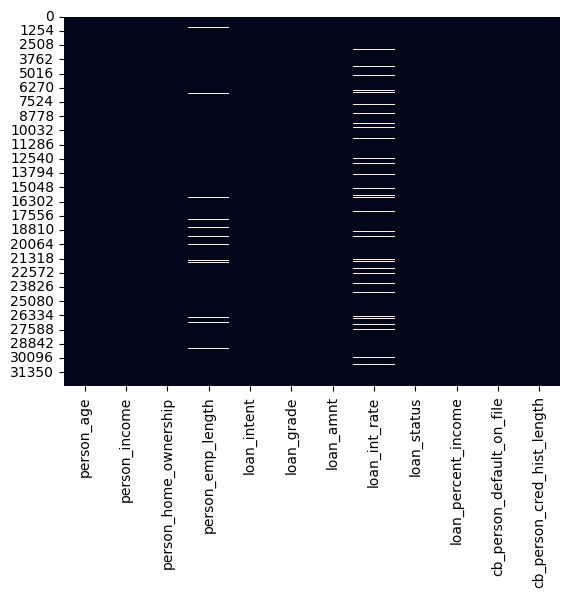

In [69]:
sns.heatmap(df.isnull(), cbar=False)

In [70]:
print(df.isnull().any())

person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length              True
loan_intent                   False
loan_grade                    False
loan_amnt                     False
loan_int_rate                  True
loan_status                   False
loan_percent_income           False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
dtype: bool


<Axes: xlabel='person_income', ylabel='loan_percent_income'>

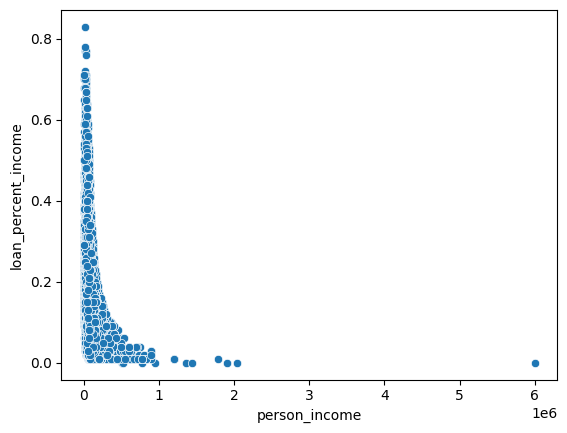

In [93]:
sns.scatterplot(x=df['person_income'], y=df['loan_percent_income'], data=df)


<Axes: xlabel='person_age', ylabel='loan_status'>

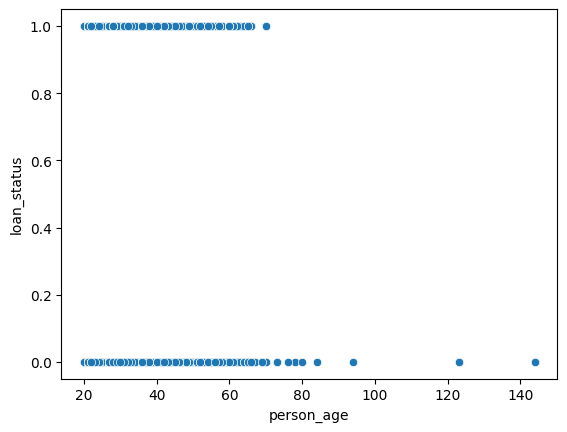

In [91]:
sns.scatterplot(x=df['person_age'], y=df['loan_status'], data=df)


<Axes: xlabel='person_age', ylabel='loan_intent'>

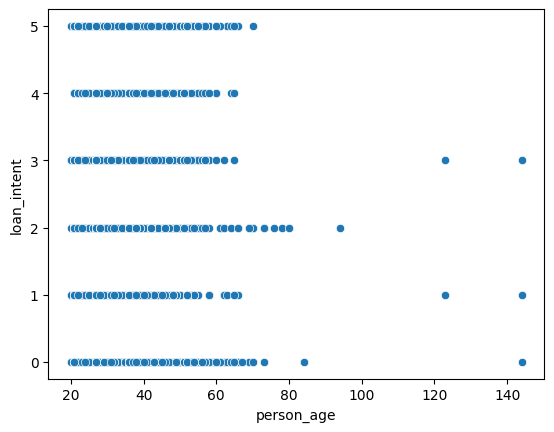

In [95]:
sns.scatterplot(x=df['person_age'], y=df['loan_intent'], data=df)


In [3]:
# Eliminar Outliers
df = df.loc[~((df['person_age'] == 123) | (df['person_age'] == 144) | (df['person_emp_length'] == 123))]
df = df.reset_index(drop=True)

In [4]:
# Detectar valores nulos de la columna person_emp_length
column = 'person_emp_length'
null_values = df[df[column].isnull()]
display(null_values)

null_values_in_column = df[column].isnull()
display(null_values_in_column.sum())

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
103,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
218,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
375,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
403,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
404,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32279,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32321,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32353,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32446,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


895

In [ ]:
#Propuestas 

# Completar valores vacios de person_emp_length utilizando informacion de loan_grade

# Calcular la mediana de la columna person_emp_length para cada categoría de loan_grade
median_emp_length_by_grade = df.groupby('loan_grade')['person_emp_length'].median()

# Función de imputación basada en la mediana por categoría
def impute_emp_length(row):
    if pd.isnull(row['person_emp_length']):
        return median_emp_length_by_grade.get(row['loan_grade'], row['person_emp_length'])
    return row['person_emp_length']

# Aplicar la función de imputación a los valores faltantes
df['person_emp_length'] = df.apply(impute_emp_length, axis=1)

In [ ]:
# Detectar valores nulos de la columna loan_int_rate
column = 'loan_int_rate'
null_values = df[df[column].isnull()]
display(null_values)

null_values_in_column = df[column].isnull()
display(null_values_in_column.sum())